In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import * 

In [2]:
PRIMARY_KEY = "RowKey"
data_RDBMS_USE_CASE = pd.read_csv("data_sim_rdbms.csv")

RDBMS_METHOD_COLUMNS = [   
    # RDBMS COLUMNS
    'infiniquantum_execution_time',
    'iqs_ducksql_memory_mb',
    'iqs_ducksql_time_s',
    'iqs_np_mps_memory_mb',
    'iqs_np_mps_time_s',
    'iqs_np_one_shot_memory_mb',
    'iqs_np_one_shot_time_s',
    'rdbms_ducksql_memory_mb',
    'rdbms_ducksql_time_s',
    'rdbms_execution_time',
    'rdbms_np_mps_memory_mb',
    'rdbms_np_mps_time_s',
    'rdbms_np_one_shot_memory_mb',
    'rdbms_np_one_shot_time_s',
    'rdbms_sqlite_memory_mb',
    'rdbms_sqlite_time_s'
]

# Separate time and memory columns
time_cols = [c for c in RDBMS_METHOD_COLUMNS if 'time' in c]
mem_cols  = [c for c in RDBMS_METHOD_COLUMNS if 'memory' in c]


In [3]:
best_time_method = data_RDBMS_USE_CASE[time_cols].idxmin(axis=1)
best_mem_method = data_RDBMS_USE_CASE[mem_cols].idxmin(axis=1)
best_time_counts = best_time_method.value_counts()
best_mem_counts  = best_mem_method.value_counts()

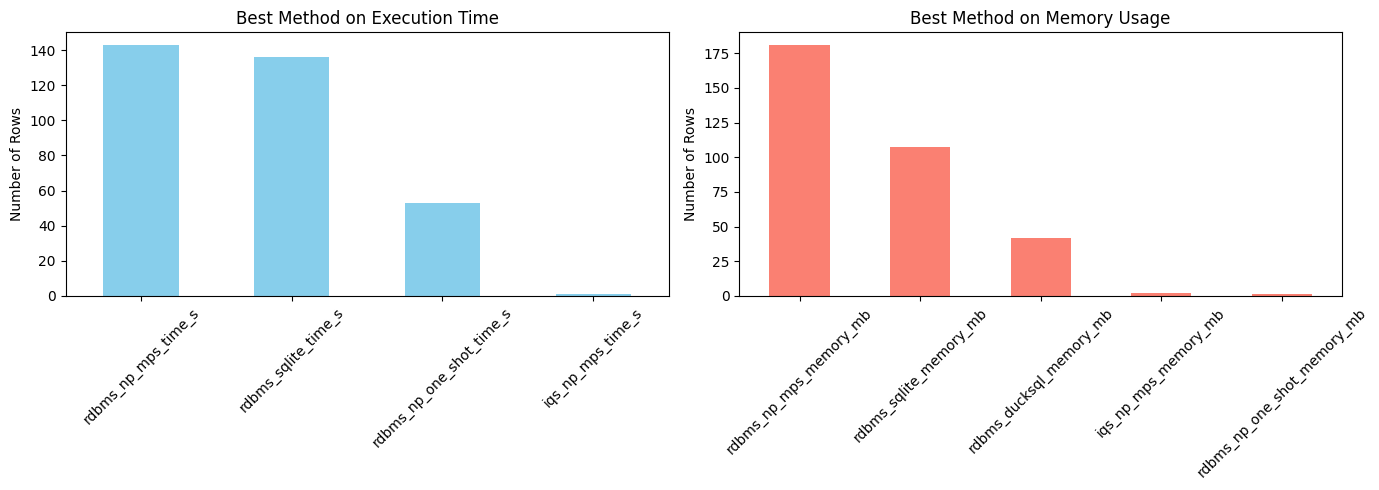

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Best on time
best_time_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Best Method on Execution Time")
axes[0].set_ylabel("Number of Rows")
axes[0].tick_params(axis='x', rotation=45)

# Best on memory
best_mem_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Best Method on Memory Usage")
axes[1].set_ylabel("Number of Rows")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<Axes: >

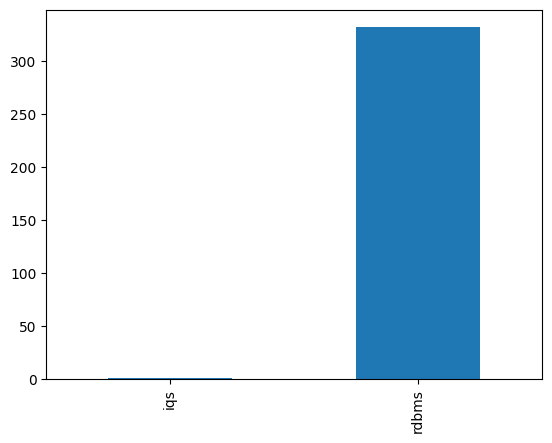

In [5]:
best_time_counts.groupby(lambda x: x.split('_')[0]).sum().plot(kind='bar')